In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Data and plotting different types of glass

In [2]:
df = pd.read_csv("glass.csv",sep=",",header="infer")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass_type_df = pd.DataFrame(df['Type'].values)

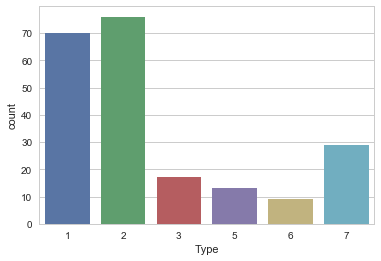

In [5]:
sns.set(style="whitegrid")
sns.countplot(x="Type",data=df)

## Creating single Decision Tree Classifier

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x = df.iloc[:,0:9]
y = df['Type']
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =5)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
decisionTreeClassifier = DecisionTreeClassifier(random_state=0)

In [10]:
y_pred = decisionTreeClassifier.fit(x_train,y_train).predict(x_test)

In [11]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.7222222222222222

## KFold with 3 splits

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [13]:
kfold = KFold(n_splits=3, random_state=0)

In [14]:
results = cross_val_score(decisionTreeClassifier, x, y, cv=kfold)

In [15]:
print(results.mean())

0.07035732916014607


## GridSearchCV 

In [27]:
param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC

In [28]:
model = RFC(n_estimators=50)

In [29]:
grid = GridSearchCV(model,param_grid,cv=5)

In [30]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 700], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
grid_pred = grid.predict(x_test)

In [32]:
grid_acc = metrics.accuracy_score(y_test,grid_pred)
print(f"Accuracy using GridSearch model is : {grid_acc.round(3)*100} %")

Accuracy using GridSearch model is : 81.5 %


In [33]:
kfold_grid = KFold(n_splits=10, random_state=0)

In [34]:
grid_result = cross_val_score(model, x, y, cv=kfold_grid)

In [35]:
grid_result.mean()

0.5580086580086581